## Extração

In [1]:
import pandas as pd
import requests

In [2]:
url = "https://dadosabertos.camara.leg.br/api/v2/"
url += "deputados?siglaUf=SP&dataInicio="
url += "2022-01-01&dataFim=2022-01-01&ordem=ASC&ordenarPor=nome"
resultado = requests.get(url)

In [3]:
deputados = pd.DataFrame(resultado.json()['dados'])

In [4]:
deputados.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,204521,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,UNIÃO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
1,204528,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,NOVO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.adrianaventura@camara.leg.br
2,204501,https://dadosabertos.camara.leg.br/api/v2/depu...,Alencar Santana,PT,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.alencarsantana@camara.leg.br
3,178972,https://dadosabertos.camara.leg.br/api/v2/depu...,Alex Manente,CIDADANIA,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.alexmanente@camara.leg.br
4,204544,https://dadosabertos.camara.leg.br/api/v2/depu...,Alexandre Frota,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.alexandrefrota@camara.leg.br


In [5]:
deputados.shape

(80, 9)

In [6]:
gastos = []
for id in deputados.id:
    despesas = "https://dadosabertos.camara.leg.br/api/v2/"
    despesas += "deputados/"+str(id)+"/despesas?ano=2022&ordem=ASC&ordenarPor=ano"
    resposta = requests.get(despesas)
    gasto = pd.DataFrame(resposta.json()['dados'])
    gasto['id'] = id
    gastos.append(gasto)

In [7]:
len(gastos)

80

In [8]:
len(gastos[0])

15

In [9]:
gastos[0]

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
0,2022,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7319093,Nota Fiscal,0,2022-01-17,379662155,280.20,https://www.camara.leg.br/cota-parlamentar/doc...,ENEL - Eletropaulo,61695227000193,280.20,0.00,,1823094,0,204521
1,2022,3,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7347446,Nota Fiscal,0,2022-03-18,00001855,17360.00,https://www.camara.leg.br/cota-parlamentar/doc...,JM ENVELOPES E ARTEFATOS DE PAPEL LTDA,02353246000172,17360.00,0.00,,1836339,0,204521
2,2022,2,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7336475,Nota Fiscal,0,2022-02-09,135869,225.00,https://www.camara.leg.br/cota-parlamentar/doc...,KALUNGA COMERCIO E INDUSTRIA GRAFICA LTDA,43283811006867,225.00,0.00,,1831248,0,204521
3,2022,3,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7352860,Nota Fiscal,0,2022-03-15,138032,436.20,https://www.camara.leg.br/cota-parlamentar/doc...,KALUNGA COMERCIO E INDUSTRIA GRAFICA LTDA,43283811006867,436.20,0.00,,1839160,0,204521
4,2022,2,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7326378,Nota Fiscal,0,2022-02-03,242055,61.70,https://www.camara.leg.br/cota-parlamentar/doc...,kalunga s.a,43283811019098,59.20,2.50,,1827266,0,204521
5,2022,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7320329,Recibos/Outros,1,2022-01-29,119217169,7344.98,https://www.camara.leg.br/cota-parlamentar/doc...,MUNICIPIO DE SAO PAULO,46395000000139,7344.98,0.00,,1823601,0,204521
6,2022,2,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7336206,Nota Fiscal,0,2022-02-24,000058,30.00,https://www.camara.leg.br/cota-parlamentar/doc...,PAPELARIA LUCCAS,31463394000148,30.00,0.00,,1831247,0,204521
7,2022,2,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7342945,Recibos/Outros,1,2022-03-11,122540854,7344.98,https://www.camara.leg.br/cota-parlamentar/doc...,PREFEITURA DE SÃO PAULO,46395000000139,7344.98,0.00,,1834278,0,204521
8,2022,2,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7336247,Nota Fiscal,0,2022-02-14,202216405729,98.14,https://www.camara.leg.br/cota-parlamentar/doc...,SABESP - COMPANHIA DE SANEAMENTO BÁSICO DO EST...,43776517000180,98.14,0.00,,1831248,0,204521
9,2022,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7319098,Nota Fiscal,0,2022-01-14,20227148745,141.65,https://www.camara.leg.br/cota-parlamentar/doc...,SABESP - COMPANHIA DE SANEAMENTO BÁSICO DO EST...,43776517000180,139.92,1.73,,1827263,0,204521


# Transformação

In [10]:
total = pd.concat(gastos)

In [11]:
# Há valores ausentes?

total.isnull().sum()

ano                    0
mes                    0
tipoDespesa            0
codDocumento           0
tipoDocumento          0
codTipoDocumento       0
dataDocumento         26
numDocumento           0
valorDocumento         0
urlDocumento         105
nomeFornecedor         0
cnpjCpfFornecedor      0
valorLiquido           0
valorGlosa             0
numRessarcimento       0
codLote                0
parcela                0
id                     0
dtype: int64

In [12]:
del total['urlDocumento']
del total['numRessarcimento']
del total['dataDocumento']

In [13]:
total

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,codLote,parcela,id
0,2022.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7319093.0,Nota Fiscal,0.0,379662155,280.20,ENEL - Eletropaulo,61695227000193,280.20,0.0,1823094.0,0.0,204521
1,2022.0,3.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7347446.0,Nota Fiscal,0.0,00001855,17360.00,JM ENVELOPES E ARTEFATOS DE PAPEL LTDA,02353246000172,17360.00,0.0,1836339.0,0.0,204521
2,2022.0,2.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7336475.0,Nota Fiscal,0.0,135869,225.00,KALUNGA COMERCIO E INDUSTRIA GRAFICA LTDA,43283811006867,225.00,0.0,1831248.0,0.0,204521
3,2022.0,3.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7352860.0,Nota Fiscal,0.0,138032,436.20,KALUNGA COMERCIO E INDUSTRIA GRAFICA LTDA,43283811006867,436.20,0.0,1839160.0,0.0,204521
4,2022.0,2.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7326378.0,Nota Fiscal,0.0,242055,61.70,kalunga s.a,43283811019098,59.20,2.5,1827266.0,0.0,204521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,2022.0,4.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7378164.0,Nota Fiscal,0.0,094630950,290.72,COMPANHIA PIRATININGA DE FORCA E LUZ,04172213000151,290.72,0.0,1852172.0,0.0,178992
11,2022.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7319804.0,Recibos/Outros,1.0,00007,2344.00,GRP TECHLAN COMÉRCIO E SERVIÇO EM INSTALAÇÕES ...,23478851000140,2344.00,0.0,1823343.0,0.0,178992
12,2022.0,2.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7329032.0,Recibos/Outros,1.0,00008,2344.00,GRP TECHLAN COMÉRCIO E SERVIÇO EM INSTALAÇÕES ...,23478851000140,2344.00,0.0,1827834.0,0.0,178992
13,2022.0,3.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7343402.0,Recibos/Outros,1.0,00009,2344.00,GRP TECHLAN COMÉRCIO E SERVIÇO EM INSTALAÇÕES ...,23478851000140,2344.00,0.0,1834442.0,0.0,178992


In [14]:
total.isnull().sum()

ano                  0
mes                  0
tipoDespesa          0
codDocumento         0
tipoDocumento        0
codTipoDocumento     0
numDocumento         0
valorDocumento       0
nomeFornecedor       0
cnpjCpfFornecedor    0
valorLiquido         0
valorGlosa           0
codLote              0
parcela              0
id                   0
dtype: int64

In [15]:
print(total.shape)
total.drop_duplicates()
print(total.shape)

(1090, 15)
(1090, 15)


In [16]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090 entries, 0 to 14
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ano                1090 non-null   float64
 1   mes                1090 non-null   float64
 2   tipoDespesa        1090 non-null   object 
 3   codDocumento       1090 non-null   float64
 4   tipoDocumento      1090 non-null   object 
 5   codTipoDocumento   1090 non-null   float64
 6   numDocumento       1090 non-null   object 
 7   valorDocumento     1090 non-null   float64
 8   nomeFornecedor     1090 non-null   object 
 9   cnpjCpfFornecedor  1090 non-null   object 
 10  valorLiquido       1090 non-null   float64
 11  valorGlosa         1090 non-null   float64
 12  codLote            1090 non-null   float64
 13  parcela            1090 non-null   float64
 14  id                 1090 non-null   int64  
dtypes: float64(9), int64(1), object(5)
memory usage: 136.2+ KB


In [17]:
total.describe()

,ano,mes,codDocumento,codTipoDocumento,valorDocumento,valorLiquido,valorGlosa,codLote,parcela,id
count,1090.0,1090.000000,1.090000e+03,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.000000
mean,2022.0,2.516514,6.889699e+06,0.847706,1355.831266,1344.129330,9.670963,1.722176e+06,0.000917,167020.728440
std,0.0,1.178395,1.775684e+06,1.371599,2487.122679,2479.639153,107.835971,4.445225e+05,0.030289,45024.769751
min,2022.0,1.000000,0.000000e+00,0.000000,0.030000,0.030000,0.000000,0.000000e+00,0.000000,66828.000000
25%,2022.0,2.000000,7.327603e+06,0.000000,154.305000,151.712500,0.000000,1.827269e+06,0.000000,152610.000000
50%,2022.0,2.000000,7.344772e+06,0.000000,345.960000,344.055000,0.000000,1.835182e+06,0.000000,178985.000000
75%,2022.0,3.000000,7.363026e+06,1.000000,1115.287500,1115.287500,0.000000,1.844371e+06,0.000000,204521.000000
max,2022.0,5.000000,7.383347e+06,4.000000,17360.000000,17360.000000,2238.330000,1.854427e+06,1.000000,218086.000000


In [18]:
total.nomeFornecedor.value_counts()

ENEL - Eletropaulo                              83
CLARO NXT TELECOMUNICAÇÕES S.A. - NET           43
WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA-ME    26
RAMAL                                           26
COMPANHIA PAULISTA DE FORÇA E LUZ               24
                                                ..
AUTO POSTO QUINTA DO RIO GRANDE LTDA             1
ALESSANDRA GONCALVES RENZI 15763532813           1
SCM PARTICIPACOES S/A                            1
JT COMERCIO DE DERIVADOS DE PETROLEO LTDA        1
Equipa2 - Comércio, locação e Serviços Ltda      1
Name: nomeFornecedor, Length: 327, dtype: int64

In [19]:
# ajustar nomes
[str(fornecedor).upper().replace("SABESP-COMPANHIA DE S.ANEAMENTO BÁSICO DO ESTADO DE SÃO PAULO", "SABESP - COMPANHIA DE S.ANEAMENTO BÁSICO DO ESTADO DE SÃO PAULO") for fornecedor in total.nomeFornecedor]

['ENEL - ELETROPAULO',
 'JM ENVELOPES E ARTEFATOS DE PAPEL LTDA',
 'KALUNGA COMERCIO E INDUSTRIA GRAFICA LTDA',
 'KALUNGA COMERCIO E INDUSTRIA GRAFICA LTDA',
 'KALUNGA S.A',
 'MUNICIPIO DE SAO PAULO',
 'PAPELARIA LUCCAS',
 'PREFEITURA DE SÃO PAULO',
 'SABESP - COMPANHIA DE SANEAMENTO BÁSICO DO ESTADO DE SÃO PAULO',
 'SABESP - COMPANHIA DE SANEAMENTO BÁSICO DO ESTADO DE SÃO PAULO',
 'TELEFÔNICA BRASIL S.A. VIVO',
 'TELEFÔNICA BRASIL S.A. VIVO',
 'TONER PRINT COM E MANUT DE EQUIP E PROD DE INFORM LTDA',
 'WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA-ME',
 'AUTO POSTO 2000 LT',
 'AMAZON SERVIÇOS DE VAREJO DO BRASIL LTDA',
 'NAC COMÉRCIO DE BRINQUEDOS LTDA',
 'ZOOM VIDEO COMUNICATIONS INC.',
 'RAMAL',
 'RAMAL',
 'RAMAL',
 'CORREIOS - SEDEX CONVENCIONAL',
 'UBER DO BRASIL TECNOLOGIA LTDA.',
 'UBER DO BRASIL TECNOLOGIA LTDA.',
 'UBER DO BRASIL TECNOLOGIA LTDA.',
 'UBER DO BRASIL TECNOLOGIA LTDA.',
 'UBER DO BRASIL TECNOLOGIA LTDA.',
 'UBER DO BRASIL TECNOLOGIA LTDA.',
 'UBER DO BRASIL TECNOLOGI

### Carga

In [20]:
from sqlalchemy import create_engine

In [21]:
engine = create_engine('sqlite:///dados_abertos.db')

In [22]:
deputados.to_sql('deputados', engine)

In [23]:
total.to_sql('despesas_total', engine)

### Análise

In [24]:
total = pd.read_sql('select * from despesas_total;', engine)

In [25]:
total.head()

,index,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,codLote,parcela,id
0,0,2022.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7319093.0,Nota Fiscal,0.0,379662155,280.2,ENEL - Eletropaulo,61695227000193,280.2,0.0,1823094.0,0.0,204521
1,1,2022.0,3.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7347446.0,Nota Fiscal,0.0,00001855,17360.0,JM ENVELOPES E ARTEFATOS DE PAPEL LTDA,02353246000172,17360.0,0.0,1836339.0,0.0,204521
2,2,2022.0,2.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7336475.0,Nota Fiscal,0.0,135869,225.0,KALUNGA COMERCIO E INDUSTRIA GRAFICA LTDA,43283811006867,225.0,0.0,1831248.0,0.0,204521
3,3,2022.0,3.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7352860.0,Nota Fiscal,0.0,138032,436.2,KALUNGA COMERCIO E INDUSTRIA GRAFICA LTDA,43283811006867,436.2,0.0,1839160.0,0.0,204521
4,4,2022.0,2.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7326378.0,Nota Fiscal,0.0,242055,61.7,kalunga s.a,43283811019098,59.2,2.5,1827266.0,0.0,204521


In [26]:
deputados = pd.read_sql('select * from deputados;', engine)

In [27]:
deputados.head()

,index,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,0,204521,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,UNIÃO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
1,1,204528,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,NOVO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.adrianaventura@camara.leg.br
2,2,204501,https://dadosabertos.camara.leg.br/api/v2/depu...,Alencar Santana,PT,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.alencarsantana@camara.leg.br
3,3,178972,https://dadosabertos.camara.leg.br/api/v2/depu...,Alex Manente,CIDADANIA,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.alexmanente@camara.leg.br
4,4,204544,https://dadosabertos.camara.leg.br/api/v2/depu...,Alexandre Frota,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.alexandrefrota@camara.leg.br


In [28]:
total = total.merge(deputados, on=['id'])

In [29]:
total.head()

,index_x,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,numDocumento,valorDocumento,nomeFornecedor,...,id,index_y,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,0,2022.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7319093.0,Nota Fiscal,0.0,379662155,280.2,ENEL - Eletropaulo,...,204521,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,UNIÃO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
1,1,2022.0,3.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7347446.0,Nota Fiscal,0.0,00001855,17360.0,JM ENVELOPES E ARTEFATOS DE PAPEL LTDA,...,204521,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,UNIÃO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
2,2,2022.0,2.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7336475.0,Nota Fiscal,0.0,135869,225.0,KALUNGA COMERCIO E INDUSTRIA GRAFICA LTDA,...,204521,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,UNIÃO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
3,3,2022.0,3.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7352860.0,Nota Fiscal,0.0,138032,436.2,KALUNGA COMERCIO E INDUSTRIA GRAFICA LTDA,...,204521,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,UNIÃO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
4,4,2022.0,2.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7326378.0,Nota Fiscal,0.0,242055,61.7,kalunga s.a,...,204521,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,UNIÃO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br


In [50]:
gastos_deputados = total.groupby(['nome']).sum()[['valorDocumento', 'valorLiquido']]

In [53]:
gastos_deputados = gastos_deputados.sort_values('valorDocumento', ascending=False)

In [54]:
gastos_deputados.head(10)

,valorDocumento,valorLiquido
nome,,
Alexandre Leite,61760.52,61760.52
Paulo Freire Costa,57639.68,57639.68
Vinicius Poit,54476.84,54476.84
Guilherme Mussi,51287.40,51287.40
Jefferson Campos,48549.34,48549.34
Alexandre Frota,45389.56,44574.20
Marcelo Squassoni,43631.71,39467.95
Vitor Lippi,42586.86,42579.41
Rosana Valle,39578.46,39521.31


In [55]:
gastos_deputados.tail(10)

,valorDocumento,valorLiquido
nome,,
Bruna Furlan,4144.11,4004.11
Ely Santos,4103.29,4103.29
Eleuses Paiva,3908.96,3908.96
Miguel Lombardi,3787.48,3757.88
David Soares,3209.90,3149.90
Carlos Zarattini,2480.31,2469.28
Rodrigo Agostinho,2118.16,2118.16
Capitão Derrite,2089.72,2028.53
Adriana Ventura,912.51,911.11


In [56]:
%matplotlib inline

<AxesSubplot:>

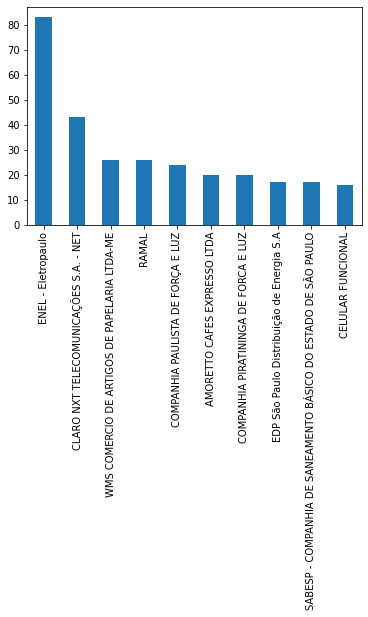

In [57]:
total.nomeFornecedor.value_counts()[:10].plot(kind="bar")